# Importing Data in Python 1

## 1. Import flat files

In [1]:
# Importing text file

In [2]:
file = open('data/moby_dick.txt', mode='r', encoding='utf-8')

print(file.read())

file.close()

﻿CHAPTER 1. Loomings.

Call me Ishmael. Some years ago--never mind how long precisely--having
little or no money in my purse, and nothing particular to interest me on
shore, I thought I would sail about a little and see the watery part of
the world. It is a way I have of driving off the spleen and regulating
the circulation. Whenever I find myself growing grim about the mouth;
whenever it is a damp, drizzly November in my soul; whenever I find
myself involuntarily pausing before coffin warehouses, and bringing up
the rear of every funeral I meet; and especially whenever my hypos get
such an upper hand of me, that it requires a strong moral principle to
prevent me from deliberately stepping into the street, and methodically
knocking people's hats off--then, I account it high time to get to sea
as soon as I can. This is my substitute for pistol and ball. With a
philosophical flourish Cato throws himself upon his sword; I quietly
take to the ship. There is nothing surprising in this. If t

In [3]:
# Importing large text files line by line

In [4]:
with open('data/moby_dick.txt', encoding='utf-8') as file:    # context manager
    print(file.readline())
    print(file.readline())
    print(file.readline())
    print(file.readline())

﻿CHAPTER 1. Loomings.



Call me Ishmael. Some years ago--never mind how long precisely--having

little or no money in my purse, and nothing particular to interest me on



### Numpy array 를 이용해 파일 읽기

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
file = 'data/mnist_test.csv'

In [7]:
digits = np.loadtxt(file, delimiter=',')   # Load file as array
digits

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.]])

In [8]:
digits.shape

(10000, 785)

In [9]:
print(type(digits))

<class 'numpy.ndarray'>


In [10]:
# reshape a row
im = digits[12, 1:]
im_sq = np.reshape(im, (28, 28))   # 28 * 28 format (=784)

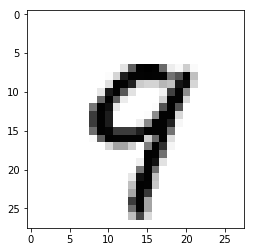

In [11]:
# Plot reshaped data
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

---

```
# 몇 가지 옵션들...

data = np.loadtxt(file, delimiter='\t', dtype=str)   # 탭 구분, 문자열

data_float = np.loadtxt(file, delimiter='\t', dtype='float', skiprows=1)   # 탭 구분, 데이터 타입, 1번째 줄 제외
```

```
# pandas 를 이용해 파일 읽기

data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])   # 탭 구분, 주석 표시, NA 치환.

data = pd.read_csv(file, header=None, nrows=5)   # 헤더 없음. 첫 5줄만 읽기.
```

## 2. Importing sheets of Excel

In [12]:
import pandas as pd

In [13]:
file = 'data/pop_growth.xlsx'

In [14]:
xl = pd.ExcelFile(file)
xl.sheet_names

['before2000', 'after2000']

In [15]:
df1 = xl.parse('before2000')   # = xl.parse(0)
df1.head()

,pop,year
0,2.53,1950
1,2.57,1951
2,2.62,1952
3,2.67,1953
4,2.71,1954


In [16]:
df2 = xl.parse(1)
df2.head()

,population,year
0,6.13,2000
1,6.20,2001
2,6.28,2002
3,6.36,2003
4,6.44,2004


In [17]:
# 1 라인 무시, 컬럼명 지정.
df1 = xl.parse(0, skiprows=1, names=['인구','년도'])
df1.head()

,인구,년도
0,2.57,1951
1,2.62,1952
2,2.67,1953
3,2.71,1954
4,2.76,1955


In [18]:
# 2번째 시트의 1번째 컬럼만.
df2 = xl.parse(1, parse_cols=0, skiprows=1, names=['인구','년도'])
df2.head()

,인구,년도
0,6.20,2001
1,6.28,2002
2,6.36,2003
3,6.44,2004
4,6.51,2005


## 3. 관계형 DB에서 데이터 가져오기

#### Link

```
# Import necessary module
from sqlalchemy import create_engine

# Create engine
engine = create_engine('sqlite:///mydb.sqlite')

# table names
table_names = engine.table_names()
```

#### SQL Queries

```
# Open engine connection
con = engine.connect()

# Perform query
rs = con.execute("SELECT * FROM Album")

df = pd.DataFrame(rs.fetchall())   # save result to DataFrame

con.close()
```

```
# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))  # first 3 rows
    df.columns = rs.keys()   # Set the DataFrame's column names

print(len(df))
print(df.head())
```

#### Querying RDB directly with pandas

```
df = pd.read_sql_query("SELECT * FROM Album", engine)

df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate", engine)

pd.read_sql_query("JOIN문 사용 가능", engine)
```